In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.style.use(['ggplot'])
%config IPCompleter.greedy=True
#plt.style.use(['dark_background'])
#plt.style.use('seaborn-dark')
#import json

In [24]:
GER_csv = pd.read_csv("DEvideos.csv")

GER_csv

In [26]:
GER_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,28741.0,20.724366,7.000593e+00,1.0,20.0,24.0,24.0,44.0
views,28741.0,548904.608260,2.263072e+06,518.0,21499.0,100227.0,389407.0,113876217.0
likes,28741.0,19828.918792,8.822811e+04,0.0,423.0,2315.0,10676.0,2811217.0
dislikes,28741.0,1335.510073,1.642648e+04,0.0,23.0,115.0,473.0,1470386.0
comment_count,28741.0,2555.641105,1.567422e+04,0.0,66.0,329.0,1254.0,827755.0


In [27]:
GER_csv.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.078482,-0.086706,0.000952,-0.027042,0.016344,-0.017932,0.005385
views,-0.078482,1.000000,0.818054,0.574395,0.683020,0.001511,0.003692,-0.002181
likes,-0.086706,0.818054,1.000000,0.500087,0.814081,-0.031688,-0.029966,-0.000360
dislikes,0.000952,0.574395,0.500087,1.000000,0.738909,-0.010295,-0.010840,-0.000131
comment_count,-0.027042,0.683020,0.814081,0.738909,1.000000,-0.027447,-0.016315,-0.000738
comments_disabled,0.016344,0.001511,-0.031688,-0.010295,-0.027447,1.000000,0.290695,-0.002432
ratings_disabled,-0.017932,0.003692,-0.029966,-0.010840,-0.016315,0.290695,1.000000,-0.001927
video_error_or_removed,0.005385,-0.002181,-0.000360,-0.000131,-0.000738,-0.002432,-0.001927,1.000000


In [28]:
GER_csv['dislikes'].mean()

1335.5100727184163

In [29]:
GER_csv['dislikes'].median()

115.0

In [30]:
GER_csv['likes'].mean()

19828.91879196966

In [31]:
GER_csv['likes'].median()

2315.0

In [32]:
#sns.barplot(x='likes', y='dislikes', data=GER_csv)

In [33]:
GER_csv.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

###  Cleaning US data

In [34]:
#Checking for null values
GER_csv.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1090
dtype: int64

In [35]:
#Convert empty description values to 0
GER_csv['description'] = GER_csv[['description']].replace('none', 0)

In [36]:
GER_csv['video_error_or_removed'].value_counts()

False    28735
True         6
Name: video_error_or_removed, dtype: int64

In [37]:
GER_csv['comments_disabled'].value_counts()

False    27949
True       792
Name: comments_disabled, dtype: int64

In [38]:
#clean df- drop thumbnail link as not used in our analysis
GER_youtube_df = GER_csv.drop(['thumbnail_link'], axis=1)

### Correlation matrix for continuous features


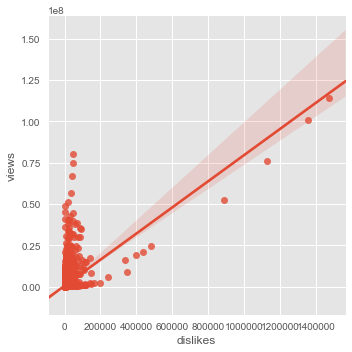

In [40]:
sns.lmplot(x='dislikes', y='views', data=GER_youtube_df)

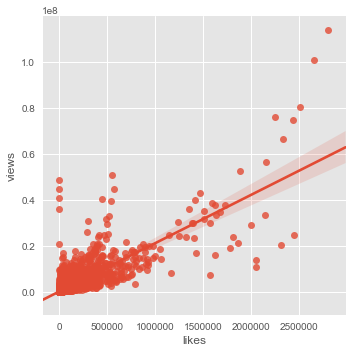

In [41]:
sns.lmplot(x='likes', y='views', data=GER_youtube_df)

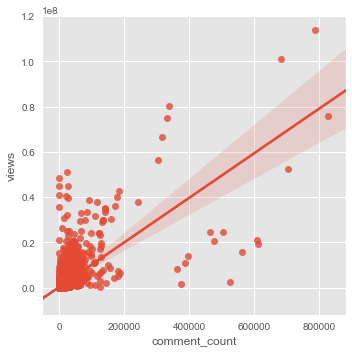

In [42]:
sns.lmplot(x='comment_count', y='views', data=GER_youtube_df)

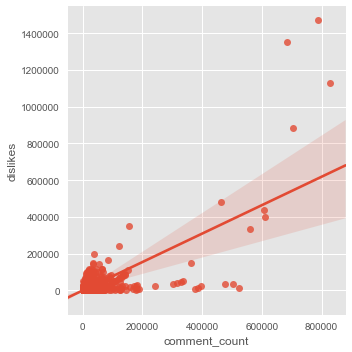

In [43]:
sns.lmplot(x='comment_count', y='dislikes', data=GER_youtube_df)

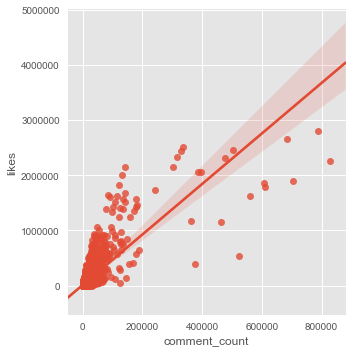

In [44]:
sns.lmplot(x='comment_count', y='likes', data=GER_youtube_df)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

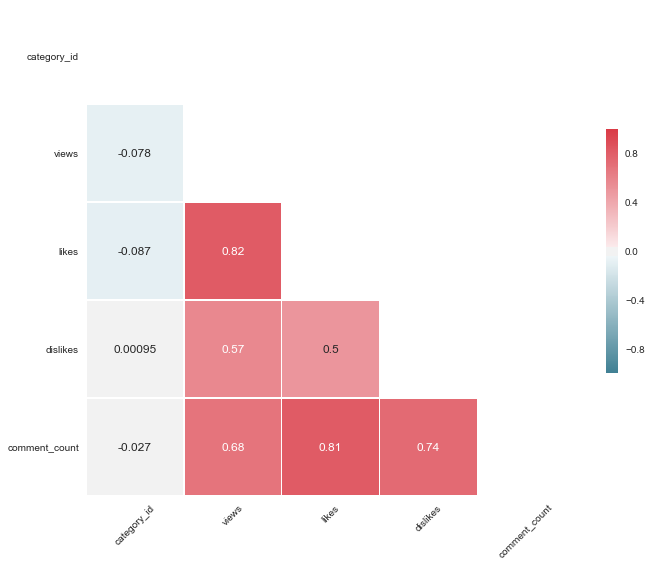

In [51]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
GER_youtube_df = pd.read_csv("DEvideos.csv")
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = GER_youtube_df[['category_id','views','likes','dislikes','comment_count']].columns

# Calculate correlation of all pairs of continuous features
corr = GER_youtube_df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

Correlation between dislikes + likes vs. comment_count is similar at 0.74 and 0.81 respectively.
This is opposed to GB where dislikes had a higher correlation to comment_count, indicating GB viewers comment more on content they dislike whereas Germans are slightly more likely to comment on liked content.

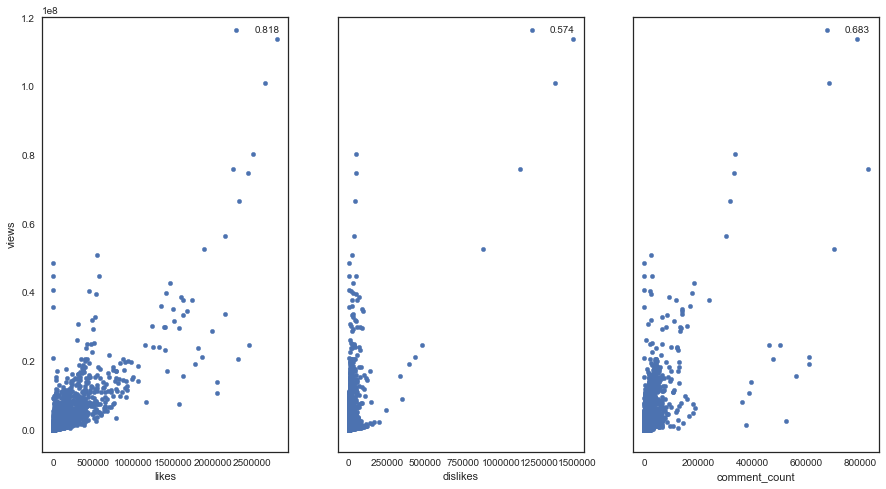

In [52]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
fig, axs = plt.subplots(1, 3, sharey=True)
GER_youtube_df.plot(kind='scatter', x='likes', y='views', label="%.3f" % GER_youtube_df[['likes', 'views']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
GER_youtube_df.plot(kind='scatter', x='dislikes', y='views', label="%.3f" % GER_youtube_df[['dislikes', 'views']].corr().as_matrix()[0,1], ax=axs[1])
GER_youtube_df.plot(kind='scatter', x='comment_count', y='views', label="%.3f" % GER_youtube_df[['comment_count', 'views']].corr().as_matrix()[0,1], ax=axs[2])

### Plot token frequency distribution: <font color = "#4DB6AC"> Description Box </font>

In [128]:
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
from yellowbrick.style.colors import resolve_colors, get_color_cycle

In [67]:
GER_youtube_df['description'] = GER_youtube_df['description'].astype('U')

In [68]:
GER_youtube_df['description']

0        Heute gibt es mal wieder ein neues Format... w...
1        Kinder ferngesteuert! Kinder lassen sich sooo ...
2        One year after the presidential election, John...
3        ►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4        18 Song Mashup über den (veränderten) Beat von...
5        Wir haben Meinungsstudie.de (► http://bit.ly/2...
6        Video mit Planet Kanax: https://youtu.be/3U51c...
7        4 unbekannte Gesichter animierter Charaktere (...
8        Antoine hat sich ein Auto ausgeliehen..schaut ...
9        Berühmt werden kann jeder, aber berühmt bleibe...
10       Dagi Bee wird Heiraten | Coldmirror bekommt Eh...
11       SHANTELL'S CHANNEL - https://www.youtube.com/s...
12       Mal schauen was unser Japaner so kann! :D\n- -...
13       Weitere Infos zu diesem Thema findest du hier:...
14       Video mit Bodyformus: https://youtu.be/EIM7RMe...
15       Über die Zukunft nachzudenken macht Spaß, oder...
16       Die Rundlauf Fußball Challenge! Jeder kennt da.

In [69]:
#instantiate vectorizer
vectorizer = CountVectorizer()

In [70]:
description_text = GER_youtube_df['description'].str.lower()

In [71]:
vectorizer.fit(description_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [61]:
print(vectorizer.vocabulary_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [72]:
stop_words = get_stop_words('german')

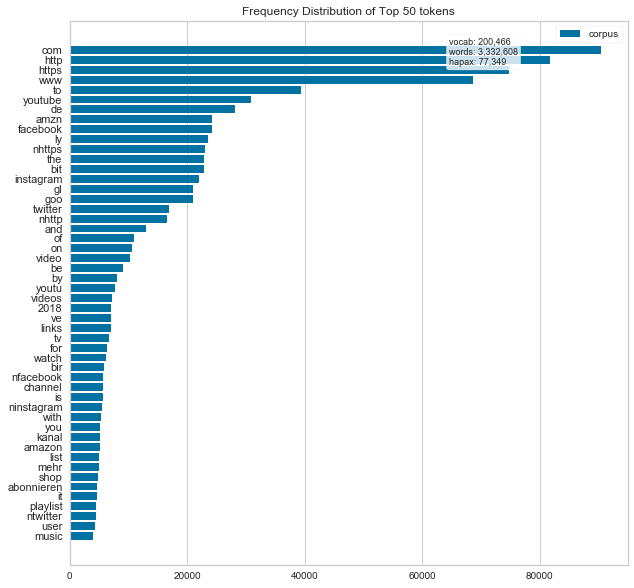

In [140]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words=stop_words)
docs       = vectorizer.fit_transform(description_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features,n=50, color='pink')

visualizer.fit(docs)
visualizer.poof()

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 11

### Plot token frequency distribution: <font color = "#8E44AD"> Title </font>


In [74]:
GER_youtube_df['title'] = GER_youtube_df['title'].astype('U')

In [75]:
GER_youtube_df['title']

0        Sing zu Ende! | Gesangseinlagen vom Feinsten |...
1        Kinder ferngesteuert im Kiosk! Erwachsene abzo...
2        The Trump Presidency: Last Week Tonight with J...
3                                      Das Fermi-Paradoxon
4                 18 SONGS mit Kelly MissesVlog (Sing-off)
5        Geld verdienen mit Online-Umfragen? Geht das w...
6                             Kanaken auf der Klassenfahrt
7        3 unbekannte Gesichter von Film/Serien-Charakt...
8               Antoine leiht Auto von Ernährungsberaterin
9        Legenden: So wird dein Ruhm unsterblich - Fame...
10       Dagi Bee wird Heiraten | Coldmirror bekommt Eh...
11                      WE WANT TO TALK ABOUT OUR MARRIAGE
12       JP Performance -  Quetschen wir den Japaner ma...
13       Diese Schlafposition solltest Du unbedingt ver...
14                         ARAB Lifestyle | mit Bodyformus
15           Die Welt in 30 Jahren - Sommer 2047 -  VOLKAN
16              RUNDLAUF FUßBALL CHALLENGE + BESTRAFUNG 

In [76]:
title_text = GER_youtube_df['title'].str.lower()

In [77]:
vectorizer.fit(title_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'das', 'dass', 'dasselbe', 'dazu', 'daß', ...', 'wollen', 'wollte', 'während', 'würde', 'würden', 'zu', 'zum', 'zur', 'zwar', 'zwischen', 'über'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

print(vectorizer.vocabulary_)

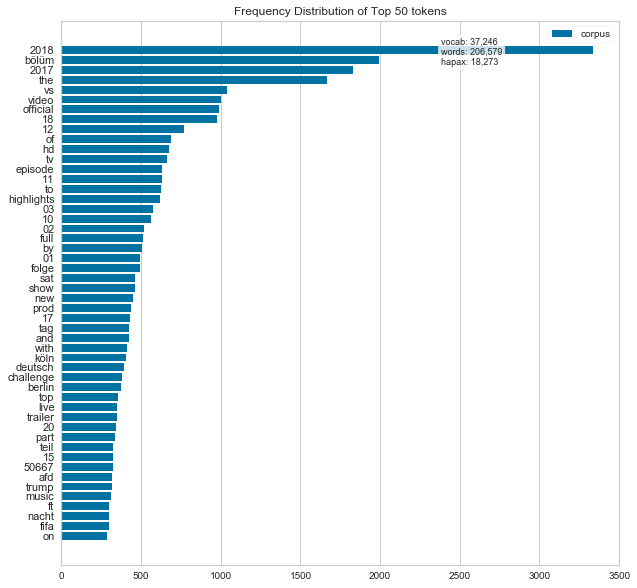

In [141]:
#stop_words = removes common conjunction words in germam 
vectorizer = CountVectorizer(stop_words=stop_words)
docs       = vectorizer.fit_transform(title_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

### Plot token frequency distribution: <font color = "#2ECC71"> Channel title </font>


In [80]:
GER_youtube_df['channel_title'] = GER_youtube_df['channel_title'].astype('U')

GER_youtube_df['channel_title']

In [82]:
channel_title_text = GER_youtube_df['channel_title'].str.lower()

In [83]:
vectorizer.fit(channel_title_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'das', 'dass', 'dasselbe', 'dazu', 'daß', ...', 'wollen', 'wollte', 'während', 'würde', 'würden', 'zu', 'zum', 'zur', 'zwar', 'zwischen', 'über'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

print(vectorizer.vocabulary_)

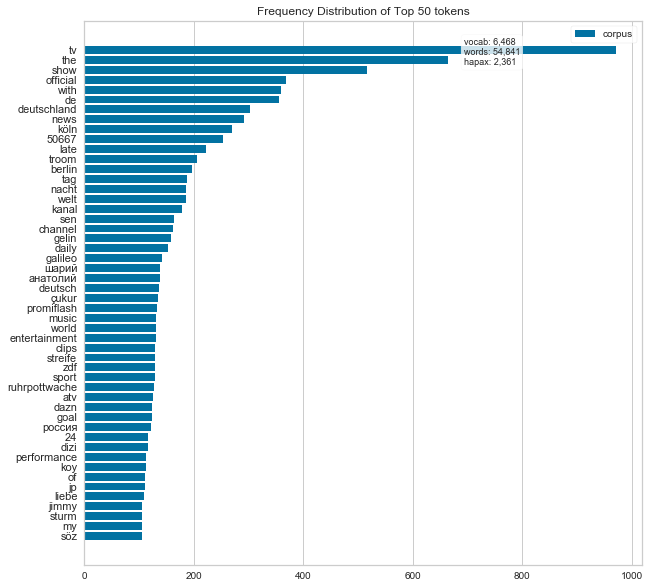

In [142]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words=stop_words)
docs       = vectorizer.fit_transform(channel_title_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

### Plot token frequency distribution: <font color = "#FFC300"> Tags </font>



In [87]:
GER_youtube_df['tags'] = GER_youtube_df['tags'].astype('U')

GER_youtube_df['tags']

In [90]:
germany_tags = GER_youtube_df['tags'].str.lower()

In [91]:
vectorizer.fit(germany_tags)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'das', 'dass', 'dasselbe', 'dazu', 'daß', ...', 'wollen', 'wollte', 'während', 'würde', 'würden', 'zu', 'zum', 'zur', 'zwar', 'zwischen', 'über'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

print(vectorizer.vocabulary_)

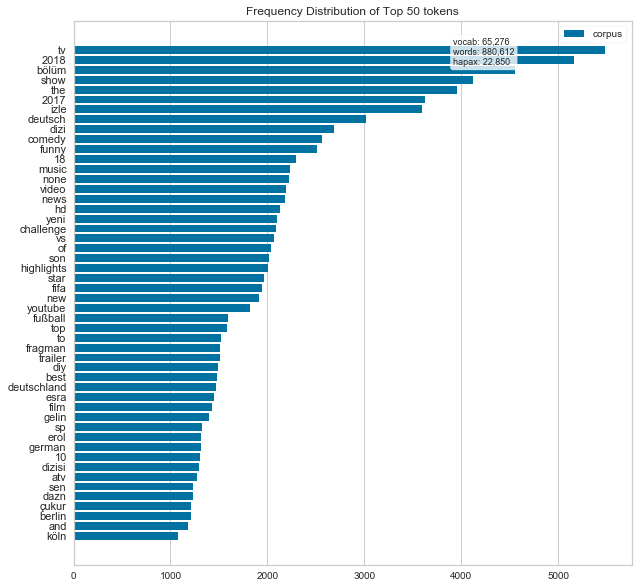

In [143]:
#stop_words = removes common conjunction words in german 
vectorizer = CountVectorizer(stop_words=stop_words)
docs       = vectorizer.fit_transform(germany_tags)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()